## Exploratory Data Analysis
### Load and Explore a CSV file

#### Import necessary libraries

In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load in data file: `trainingdata02.csv`

In [429]:
training_data = pd.read_csv("../../data/trainingdata02.csv")

print(training_data.info())

training_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100024 entries, 0 to 100023
Data columns (total 74 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   battle_id         100024 non-null  int64  
 1   turn              100024 non-null  int64  
 2   total_turn        100024 non-null  int64  
 3   rank              100024 non-null  float64
 4   weather           36241 non-null   object 
 5   field             35721 non-null   object 
 6   condition         16028 non-null   object 
 7   p1_side           13712 non-null   object 
 8   p1a_form          100024 non-null  object 
 9   p1a_hp            100024 non-null  int64  
 10  p1a_ability       100024 non-null  object 
 11  p1a_item          87484 non-null   object 
 12  p1a_move          70839 non-null   object 
 13  p1a_status        10442 non-null   object 
 14  p1a_tera          69575 non-null   object 
 15  p1a_stat_boost    30043 non-null   object 
 16  p1a_status_other  85

,battle_id,turn,total_turn,rank,weather,field,condition,p1_side,p1a_form,p1a_hp,...,p2c_status,p2c_tera,p2d_form,p2d_hp,p2d_ability,p2d_item,p2d_move,p2d_status,p2d_tera,win
0,2099996083,0,5,1643.5,NaN,Psychic Terrain:5,NaN,NaN,Smeargle,100,...,NaN,unknown,unknown,100,unknown,unknown,unknown,NaN,unknown,-1
1,2099996083,1,5,1643.5,NaN,Psychic Terrain:4,Trick Room:4,NaN,Smeargle,1,...,NaN,unknown,unknown,100,unknown,unknown,unknown,NaN,unknown,-1
2,2099996083,2,5,1643.5,SunnyDay:5,Psychic Terrain:3,Trick Room:3,NaN,Torkoal,100,...,NaN,unknown,unknown,100,unknown,unknown,unknown,NaN,unknown,-1
3,2099996083,3,5,1643.5,SunnyDay:4,Psychic Terrain:2,Trick Room:2,NaN,Torkoal,100,...,fnt,unknown,unknown,100,unknown,unknown,unknown,NaN,unknown,-1
4,2099996083,4,5,1643.5,SunnyDay:3,Psychic Terrain:1,Trick Room:1,NaN,Torkoal,55,...,fnt,unknown,Urshifu,0,unknown,unknown,"Wicked Blow:3,Detect:4",fnt,unknown,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100019,2127998356,2,3,1464.5,NaN,Psychic Terrain:3,NaN,NaN,Flutter Mane,100,...,fnt,unknown,Gallade,0,unknown,unknown,Sacred Sword:14,fnt,unknown,1
100020,2127998356,3,3,1464.5,NaN,Psychic Terrain:2,NaN,NaN,Flutter Mane,100,...,fnt,NaN,Gallade,0,unknown,unknown,Sacred Sword:14,fnt,NaN,1
100021,2127999658,0,3,1064.0,SunnyDay:5,NaN,NaN,NaN,Groudon,100,...,NaN,unknown,unknown,100,unknown,unknown,unknown,NaN,unknown,-1
100022,2127999658,1,3,1064.0,SunnyDay:4,NaN,NaN,NaN,Groudon,14,...,NaN,unknown,unknown,100,unknown,unknown,unknown,NaN,unknown,-1


### Q: Is there an advantage going first?

In [430]:
# who won each match?
    # if 'win' = 1 -> player 1 won
    # if 'win' = 0 -> player 2 won

working_df_copy = training_data.copy()
unique_matches = working_df_copy.drop_duplicates('battle_id')
winner_df = unique_matches[["win"]]

winner_df = winner_df.groupby("win").size().reset_index(name = "counts")
winner_df.win = winner_df.win.replace([-1, 0, 1], ['player 2', 'tie', 'player 1'])
winner_df["percent_win"] = round(100*(winner_df["counts"] / winner_df.counts.sum()), 3)

winner_df = winner_df.sort_values("win")
winner_df


,win,counts,percent_win
2,player 1,7324,50.601
0,player 2,7149,49.392
1,tie,1,0.007


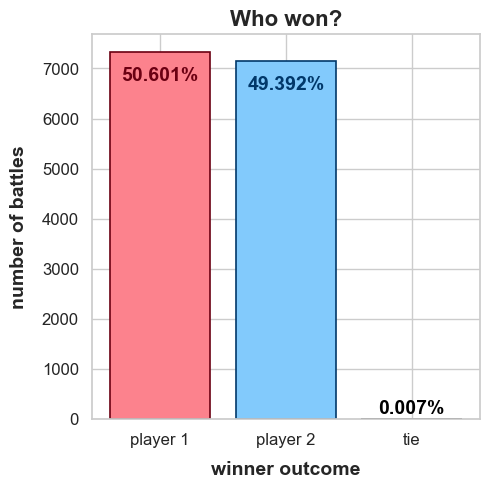

In [431]:
#Plot winning splits:

sns.set_style("whitegrid")

plt.figure(figsize = (5,5))

plt.bar(x = winner_df["win"],
        height = winner_df["counts"],
        color = ['#fc828d', '#82cafc', 'gray'],
        edgecolor = ['#6b0012', 'xkcd:marine blue', 'black'],
        linewidth = 1.2)

plt.text(0, 6750, (f"{winner_df.percent_win[2]}%"),
         c = '#6b0012', fontsize = 14, weight = 'bold', ha = 'center', va = 'baseline')
plt.text(1, 6580, (f"{winner_df.percent_win[0]}%"),
         c = 'xkcd:marine blue', fontsize = 14, weight = 'bold', ha = 'center', va = 'baseline')
plt.text(2, 100, (f"{winner_df.percent_win[1]}%"),
         c = 'black', fontsize = 14, weight = 'bold', ha = 'center', va = 'baseline')

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.xlabel("winner outcome", fontsize = 14, weight = "bold", labelpad = 10)
plt.ylabel("number of battles", fontsize = 14, weight = "bold", labelpad = 10)
plt.title('Who won?', fontsize = 16, weight = "bold")

plt.savefig('Battle_Winner_Outcome.png', bbox_inches='tight')

plt.show()


Is there an advantage in going first? Possibly but very slight advantage...

### Q: How long is the 'average' battle?

In [432]:
# how many turns does a battle take?

working_df_copy = training_data.copy()

unique_matches = working_df_copy.drop_duplicates('battle_id')
total_turns_df = unique_matches[["battle_id", "total_turn"]]

total_turns_df.total_turn.nunique()
total_turns_df.total_turn.value_counts()
print(f"Most battles last {working_df_copy.total_turn.mode()[0]} turns")

# average battle length
avg_total_turns = total_turns_df.loc[:, 'total_turn'].mean()
print(f"The average length of battle is: {round(avg_total_turns, 3)} turns")

Most battles last 5 turns
The average length of battle is: 6.062 turns


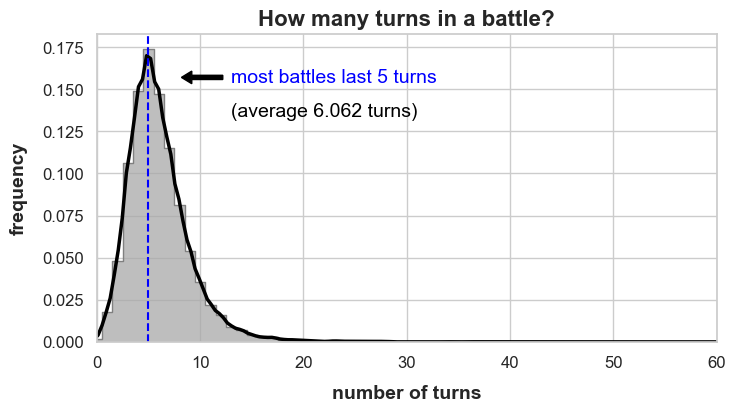

In [433]:
# distribution of total_turns

sns.set_style("whitegrid")

plt.figure(figsize = (8,4))

sns.histplot(x = total_turns_df["total_turn"],
            bins = 75,
            binrange = (0, 77),
            element = 'step',
            color = 'darkgray',
            ec = 'gray',
            discrete = True,
            stat = 'density')

sns.kdeplot(data = total_turns_df,
            x = "total_turn",
            color = 'black',
            linewidth = 2.5)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.xlim(0, 60)
plt.axvline(x = 5, color = 'blue', linewidth = 1.5, linestyle = '--')
plt.yticks([0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175])

plt.text(13, 0.154, (f"most battles last {working_df_copy.total_turn.mode()[0]} turns"),
         c = 'blue', fontsize = 14, ha = 'left', va = 'baseline')
plt.arrow(12.2, 0.157, -3, 0.0, color = 'black', width = 0.0025, head_length = 1)

plt.text(13, 0.134, (f"(average {round(avg_total_turns, 3)} turns)"),
         c = 'black', fontsize = 14, ha = 'left', va = 'baseline')

plt.xlabel("number of turns", fontsize = 14, weight = "bold", labelpad = 10)
plt.ylabel("frequency", fontsize = 14, weight = "bold", labelpad = 10)
plt.title('How many turns in a battle?', fontsize = 16, weight = "bold")

plt.savefig('Total_Turns_per_Battle.png', bbox_inches='tight')

plt.show()



### Q: What Pokemon are frequently on winning vs losing teams?

In [434]:
working_df_copy = training_data.copy()

# 4 pokemon total, abcd
    # a and b are active, c and d are back-ups (unknown until played)
    # once a and b are no longer in play -> become c and d
    # take last 'turn' to see all pokemon played

# all 4 pokemon player 1 played 
    # Apply idxmax() and use .loc() on dataframe to filter the rows with max values:
player1_pokemon = working_df_copy[['battle_id', 'turn', 'p1a_form', 'p1b_form',
                                   'p1c_form', 'p1d_form', 'win']]
player1_all_pokemon = player1_pokemon.loc[player1_pokemon.groupby(["battle_id"])["turn"].idxmax()]

# all 4 pokemon player 2 played 
    # Apply idxmax() and use .loc() on dataframe to filter the rows with max values:
player2_pokemon = working_df_copy[['battle_id', 'turn', 'p2a_form', 'p2b_form',
                                   'p2c_form', 'p2d_form', 'win']]
player2_all_pokemon = player2_pokemon.loc[player2_pokemon.groupby(["battle_id"])["turn"].idxmax()]

#combine p1 + p2 and reorder columns
all_pokemon_played = pd.merge(player1_all_pokemon, player2_all_pokemon)
all_pokemon_played = all_pokemon_played.reindex(columns=['battle_id', 'turn', 'p1a_form', 'p1b_form',
                                                         'p1c_form', 'p1d_form', 'p2a_form', 'p2b_form',
                                                         'p2c_form', 'p2d_form', 'win'])
all_pokemon_played

,battle_id,turn,p1a_form,p1b_form,p1c_form,p1d_form,p2a_form,p2b_form,p2c_form,p2d_form,win
0,2099996083,4,Torkoal,Calyrex-Ice,Smeargle,unknown,Torkoal,Calyrex-Ice,Indeedee-F,Urshifu,-1
1,2099997604,6,Torkoal,Calyrex-Ice,Annihilape,Brute Bonnet,Lycanroc,Tyranitar,Indeedee-F,Urshifu,-1
2,2100002072,3,Tyranitar,Lycanroc,Tornadus,Urshifu,Torkoal,Calyrex-Ice,Mienshao,Farigiraf,1
3,2100002639,9,Iron Jugulis,Miraidon,Iron Valiant,Gholdengo,Indeedee-F,Calyrex-Shadow,Lycanroc,Tyranitar,1
4,2100002744,4,Heatran,Calyrex-Ice,Whimsicott,Urshifu,Calyrex-Ice,Urshifu,Annihilape,unknown,-1
...,...,...,...,...,...,...,...,...,...,...,...
14469,2127997699,2,Lilligant-Hisui,Torkoal,unknown,unknown,Incineroar,Zamazenta-Crowned,Milotic,unknown,1
14470,2127997839,6,Indeedee-F,Raichu,Kyogre,Primarina,Calyrex-Ice,Ogerpon-Hearthflame,Dondozo,Rillaboom,-1
14471,2127998319,5,Miraidon,Tornadus,Iron Bundle,Incineroar,Miraidon,Volbeat,Chi-Yu,Ogerpon-Cornerstone,1
14472,2127998356,3,Flutter Mane,Chi-Yu,unknown,unknown,Necrozma-Dawn-Wings,Ursaluna,Indeedee-F,Gallade,1


#### Winning pokemons for player 1:

In [435]:
#convert series into long table
player1_long = pd.melt(player1_all_pokemon, id_vars=['battle_id', 'win'],
                       value_vars=['p1a_form', 'p1b_form', 'p1c_form', 'p1d_form'])
p1_winning_mons = player1_long[player1_long['win'] == 1].value.value_counts()

p1_winning_mons_df = p1_winning_mons.to_frame().reset_index()

# filter out 'unknown' values and return top 50 pokemon used
p1_winning_mons_df_thresh = p1_winning_mons_df[p1_winning_mons_df['count'] > 120]
p1_winning_mons_df_thresh = p1_winning_mons_df_thresh[p1_winning_mons_df['value'] != 'unknown']

p1_winning_mons_df_thresh

/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_15016/237232413.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p1_winning_mons_df_thresh = p1_winning_mons_df_thresh[p1_winning_mons_df['value'] != 'unknown']


,value,count
1,Incineroar,1393
2,Tornadus,1056
3,Calyrex-Ice,1022
4,Flutter Mane,1015
5,Miraidon,889
6,Rillaboom,862
7,Urshifu-Rapid-Strike,799
8,Calyrex-Shadow,792
9,Raging Bolt,729
10,Amoonguss,674


#### Winning pokemons for player 2:

In [436]:
#convert series into long table
player2_long = pd.melt(player2_all_pokemon, id_vars=['battle_id', 'win'],
                       value_vars=['p2a_form', 'p2b_form', 'p2c_form', 'p2d_form'])
p2_winning_mons = player2_long[player2_long['win'] == -1].value.value_counts()

p2_winning_mons_df = p2_winning_mons.to_frame().reset_index()

# filter out 'unknown' values and return top 50 pokemon used
p2_winning_mons_df_thresh = p2_winning_mons_df[p2_winning_mons_df['count'] > 108]
p2_winning_mons_df_thresh = p2_winning_mons_df_thresh[p2_winning_mons_df['value'] != 'unknown']

p2_winning_mons_df_thresh

/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_15016/2494552986.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p2_winning_mons_df_thresh = p2_winning_mons_df_thresh[p2_winning_mons_df['value'] != 'unknown']


,value,count
1,Incineroar,1368
2,Calyrex-Ice,1021
3,Tornadus,993
4,Flutter Mane,951
5,Miraidon,864
6,Rillaboom,798
7,Calyrex-Shadow,755
8,Urshifu-Rapid-Strike,726
9,Kyogre,641
10,Raging Bolt,630


#### Losing pokemons for player 1:

In [437]:
# losing pokemons for player 1

#convert series into long table
player1_long = pd.melt(player1_all_pokemon, id_vars=['battle_id', 'win'],
                       value_vars=['p1a_form', 'p1b_form', 'p1c_form', 'p1d_form'])
p1_losing_mons = player1_long[player1_long['win'] == -1].value.value_counts()

p1_losing_mons_df = p1_losing_mons.to_frame().reset_index()

# filter out 'unknown' values and return top 50 pokemon used
p1_losing_mons_df_thresh = p1_losing_mons_df[p1_losing_mons_df['count'] > 118]
p1_losing_mons_df_thresh = p1_losing_mons_df_thresh[p1_losing_mons_df['value'] != 'unknown']

p1_losing_mons_df_thresh

/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_15016/3648202081.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p1_losing_mons_df_thresh = p1_losing_mons_df_thresh[p1_losing_mons_df['value'] != 'unknown']


,value,count
0,Incineroar,1569
2,Tornadus,1013
3,Flutter Mane,1013
4,Calyrex-Ice,1009
5,Rillaboom,909
6,Miraidon,884
7,Calyrex-Shadow,821
8,Urshifu-Rapid-Strike,805
9,Amoonguss,690
10,Raging Bolt,648


#### Losing pokemons for player 2:

In [438]:
# losing pokemons for player 2

#convert series into long table
player2_long = pd.melt(player2_all_pokemon, id_vars=['battle_id', 'win'],
                       value_vars=['p2a_form', 'p2b_form', 'p2c_form', 'p2d_form'])
p2_losing_mons = player2_long[player2_long['win'] == 1].value.value_counts()

p2_losing_mons_df = p2_losing_mons.to_frame().reset_index()

# filter out 'unknown' values and return top 50 pokemon used
p2_losing_mons_df_thresh = p2_losing_mons_df[p2_losing_mons_df['count'] > 120]
p2_losing_mons_df_thresh = p2_losing_mons_df_thresh[p2_losing_mons_df['value'] != 'unknown']

p2_losing_mons_df_thresh

/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_15016/3487562270.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p2_losing_mons_df_thresh = p2_losing_mons_df_thresh[p2_losing_mons_df['value'] != 'unknown']


,value,count
0,Incineroar,1542
2,Flutter Mane,1056
3,Tornadus,1035
4,Calyrex-Ice,988
5,Miraidon,972
6,Rillaboom,939
7,Urshifu-Rapid-Strike,882
8,Calyrex-Shadow,860
9,Farigiraf,679
10,Kyogre,656


#### Most frequent winning pokemon (regardless of player)

In [439]:
# modify win column for p2 such that win = 1 and lose = -1
player2_long_mod = player2_long
player2_long_mod["win"] = np.where(player2_long_mod["win"] == -1, 1, -1)
player2_long_mod

# RUNNING AGAIN WILL SWITCH BACK TO ORIGINAL FORMAT

,battle_id,win,variable,value
0,2099996083,1,p2a_form,Torkoal
1,2099997604,1,p2a_form,Lycanroc
2,2100002072,-1,p2a_form,Torkoal
3,2100002639,-1,p2a_form,Indeedee-F
4,2100002744,1,p2a_form,Calyrex-Ice
...,...,...,...,...
57891,2127997699,-1,p2d_form,unknown
57892,2127997839,1,p2d_form,Rillaboom
57893,2127998319,-1,p2d_form,Ogerpon-Cornerstone
57894,2127998356,-1,p2d_form,Gallade


In [440]:
#combine all pokemon from both players to find winning pokemon
all_pkmn_long = pd.concat([player1_long, player2_long_mod],axis=0, ignore_index=True, sort=False)

#convert series into long table
all_winning_pkmn = all_pkmn_long[all_pkmn_long['win'] == 1].value.value_counts()
all_winning_pkmn_df = all_winning_pkmn.to_frame().reset_index()

# filter out 'unknown' values and modify count threshold to return top 50 pokemon used
all_winning_pkmn_df_thresh = all_winning_pkmn_df[all_winning_pkmn_df['count'] > 235]
all_winning_pkmn_df_thresh = all_winning_pkmn_df_thresh[all_winning_pkmn_df['value'] != 'unknown']

all_winning_pkmn_df_thresh

/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_15016/1568351500.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_winning_pkmn_df_thresh = all_winning_pkmn_df_thresh[all_winning_pkmn_df['value'] != 'unknown']


,value,count
1,Incineroar,2761
2,Tornadus,2049
3,Calyrex-Ice,2043
4,Flutter Mane,1966
5,Miraidon,1753
6,Rillaboom,1660
7,Calyrex-Shadow,1547
8,Urshifu-Rapid-Strike,1525
9,Raging Bolt,1359
10,Amoonguss,1273


#### Most frequent losing pokemon (regardless of player)

In [441]:
#combine all pokemon from both players to find losing pokemon
all_pkmn_long = pd.concat([player1_long, player2_long_mod],axis=0, ignore_index=True, sort=False)

#convert series into long table
all_losing_pkmn = all_pkmn_long[all_pkmn_long['win'] == -1].value.value_counts()
all_losing_pkmn_df = all_losing_pkmn.to_frame().reset_index()

# filter out 'unknown' values and modify count threshold to return top 50 pokemon used
all_losing_pkmn_df_thresh = all_losing_pkmn_df[all_losing_pkmn_df['count'] > 235]
all_losing_pkmn_df_thresh = all_losing_pkmn_df_thresh[all_losing_pkmn_df['value'] != 'unknown']

all_losing_pkmn_df_thresh

/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_15016/3645149018.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_losing_pkmn_df_thresh = all_losing_pkmn_df_thresh[all_losing_pkmn_df['value'] != 'unknown']


,value,count
0,Incineroar,3111
2,Flutter Mane,2069
3,Tornadus,2048
4,Calyrex-Ice,1997
5,Miraidon,1856
6,Rillaboom,1848
7,Urshifu-Rapid-Strike,1687
8,Calyrex-Shadow,1682
9,Amoonguss,1331
10,Raging Bolt,1298


#### Plots: histrograms of distributions

In [464]:
# filter out 'unknown' values and modify count threshold to return top 50 pokemon used
all_winning_top25 = all_winning_pkmn_df[all_winning_pkmn_df['count'] > 500]
all_winning_top25 = all_winning_top25[all_winning_pkmn_df['value'] != 'unknown']

all_winning_top25

/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_15016/4124796940.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_winning_top25 = all_winning_top25[all_winning_pkmn_df['value'] != 'unknown']


,value,count
1,Incineroar,2761
2,Tornadus,2049
3,Calyrex-Ice,2043
4,Flutter Mane,1966
5,Miraidon,1753
6,Rillaboom,1660
7,Calyrex-Shadow,1547
8,Urshifu-Rapid-Strike,1525
9,Raging Bolt,1359
10,Amoonguss,1273


In [442]:
# filter out 'unknown' values and modify count threshold to return top 50 pokemon used
all_losing_top25 = all_losing_pkmn_df[all_losing_pkmn_df['count'] > 550]
all_losing_top25 = all_losing_top25[all_losing_pkmn_df['value'] != 'unknown']

all_losing_top25

/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_15016/3570065053.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_winning_top25 = all_winning_top25[all_winning_pkmn_df['value'] != 'unknown']
/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_15016/3570065053.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_losing_top25 = all_losing_top25[all_losing_pkmn_df['value'] != 'unknown']


,value,count
0,Incineroar,3111
2,Flutter Mane,2069
3,Tornadus,2048
4,Calyrex-Ice,1997
5,Miraidon,1856
6,Rillaboom,1848
7,Urshifu-Rapid-Strike,1687
8,Calyrex-Shadow,1682
9,Amoonguss,1331
10,Raging Bolt,1298


In [443]:
win_tick_label=['Incineroar', 'Tornadus', 'Calyrex-Ice', 'Flutter Mane', 'Miraidon',
                'Rillaboom', 'Calyrex-Shadow', 'Urshifu-Rapid-Strike', 'Raging Bolt', 'Amoonguss',
                'Kyogre', 'Indeedee-F', 'Zamazenta-Crowned', 'Chi-Yu', 'Farigiraf',
                'Urshifu', 'Whimsicott', 'Koraidon', 'Terapagos-Stellar', 'Chien-Pao',
                'Groudon', 'Ursaluna-Bloodmoon', 'Ogerpon-Wellspring', 'Pelipper', 'Grimmsnarl']

win_color=['#FF593C', '#78A42D', '#B9F1E1', '#38768A', '#363385', '#2A814B', '#5C2E9C', '#A9AFAB', '#E9C600',
           '#B5244D', '#195099', '#564F79', '#EB77C0', '#FFC87F', '#FF9B30', '#6D6C6F', '#FFF8CD', '#D51F22',
           '#9FF5FF', '#FFFFFF', '#942514', '#6B3F2C', '#367BF6', '#AAD8F1', '#A8327D']

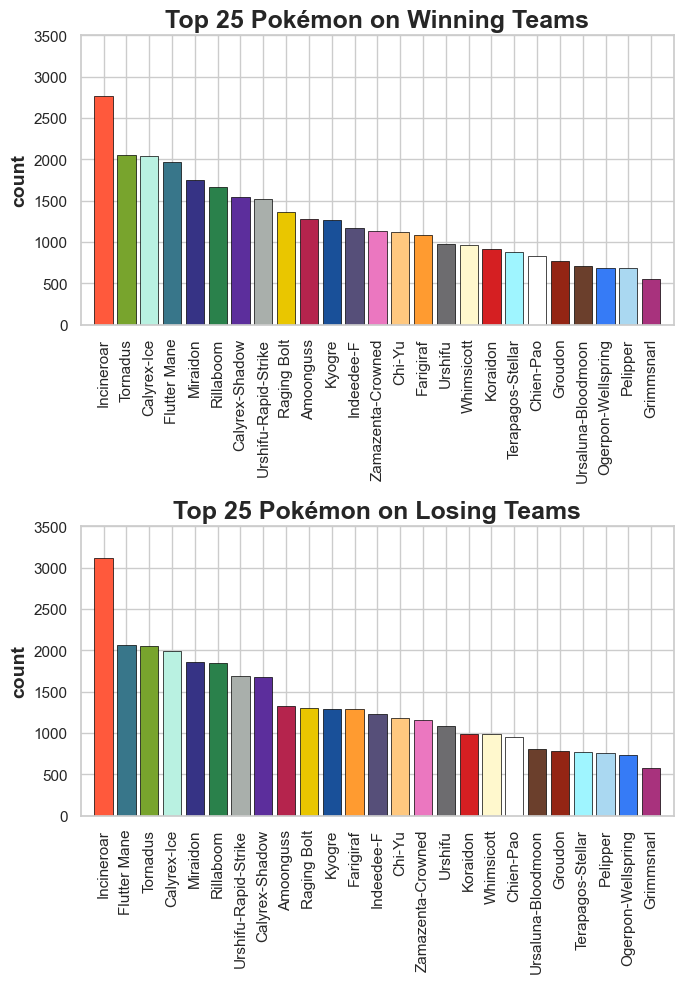

In [444]:
#Combined Plots, top 25 pokemons:

plt.figure(figsize = (7,10))

# winning pokemons
sns.set_style("whitegrid")

ax1 = plt.subplot(2,1,1) 
ax1.bar(all_winning_top25['value'],
        all_winning_top25['count'],
        tick_label = win_tick_label, color = win_color, edgecolor = 'black', linewidth = 0.5, align = 'center')

plt.ylim(0, 3500)
plt.xlim(-1, 25)
plt.xticks(rotation = 90)

plt.ylabel("count", fontsize = 14, weight = 'bold')
plt.title("Top 25 Pokémon on Winning Teams", fontsize = 18, weight = 'bold')

#import matplotlib.patches as mpatches
## make patches from the legends and corresponding colors
#patch_list = []
#i = 0
#for each_legend in win_tick_label:
#    patch_list.append(mpatches.Patch(label = each_legend, fc = win_color[i], ec = 'black', linewidth = 0.5))
#    i += 1
## add made patches to the plot
#plt.legend(handles = patch_list, title = 'Most Poplular Pokémon\n', loc='center left', bbox_to_anchor=(1, 0), ncol = 2)

# losing pokemons
ax2 = plt.subplot(2,1,2) 
ax2.bar(all_losing_top25['value'],
        all_losing_top25['count'],
        color = lose_custom_color, edgecolor = 'black', linewidth = 0.5, align = 'center')

plt.ylim(0, 3500)
plt.xlim(-1, 25)
plt.xticks(rotation = 90)

plt.ylabel("count", fontsize = 14, weight = 'bold')
plt.title("Top 25 Pokémon on Losing Teams", fontsize = 18, weight = 'bold')

plt.tight_layout()

plt.savefig('Top_25_Pokemon_WinvsLose.png', bbox_inches = 'tight')

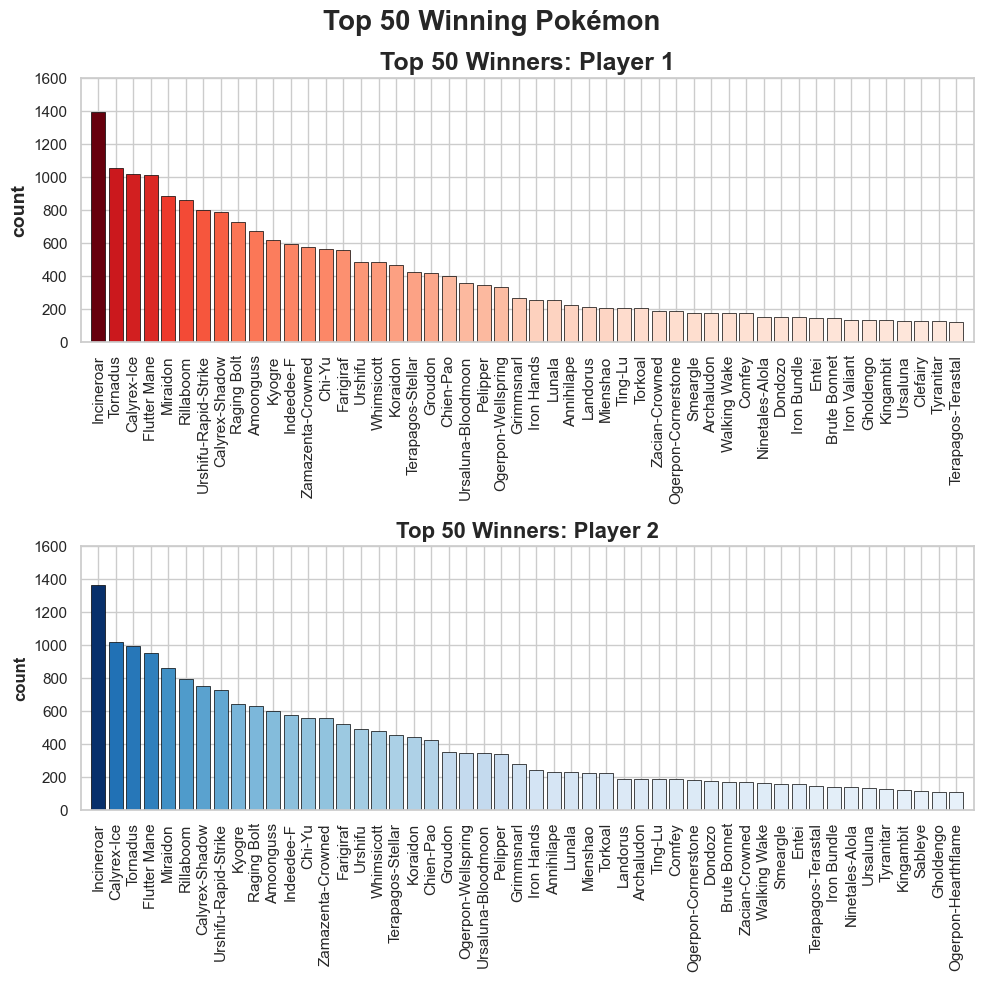

In [446]:
# Combine Winners
y = p1_winning_mons_df_thresh['count']
my_cmap_R = plt.get_cmap("Reds")
rescale_red = lambda y: (y) / (np.max(y))

y = p2_winning_mons_df_thresh['count']
my_cmap_B = plt.get_cmap("Blues")
rescale_blue = lambda y: (y) / (np.max(y))

plt.figure(figsize = (10,10))

# winning pokemons p1
sns.set_style("whitegrid")
ax1 = plt.subplot(2,1,1) 
ax1.bar(p1_winning_mons_df_thresh['value'],
        p1_winning_mons_df_thresh['count'],
        edgecolor = 'black',
        linewidth = 0.5,
        color = my_cmap_R(rescale_red(y)))

plt.ylim(0, 1600)
plt.xlim(-1, 50)
plt.xticks(rotation = 90)

#plt.xlabel("Pokemon Name", fontsize = 12, weight = 'bold')
plt.ylabel("count", fontsize = 14, weight = 'bold')
plt.title("Top 50 Winners: Player 1", fontsize = 18, weight = 'bold')
  
# winning pokemons p2
ax2 = plt.subplot(2,1,2) 
ax2.bar(p2_winning_mons_df_thresh['value'],
        p2_winning_mons_df_thresh['count'],
        edgecolor = 'black',
        linewidth = 0.5,
        color = my_cmap_B(rescale_blue(y)))

plt.ylim(0, 1600)
plt.xlim(-1, 50)
plt.xticks(rotation = 90)

#plt.xlabel("Pokemon Name", fontsize = 12, weight = 'bold')
plt.ylabel("count", fontsize = 12, weight = 'bold')
plt.title("Top 50 Winners: Player 2", fontsize = 16, weight = 'bold')

plt.suptitle('Top 50 Winning Pokémon', weight = 'bold', fontsize = 20)

plt.tight_layout()

plt.savefig('Top_50_Pokemon_Winners.png', bbox_inches = 'tight')



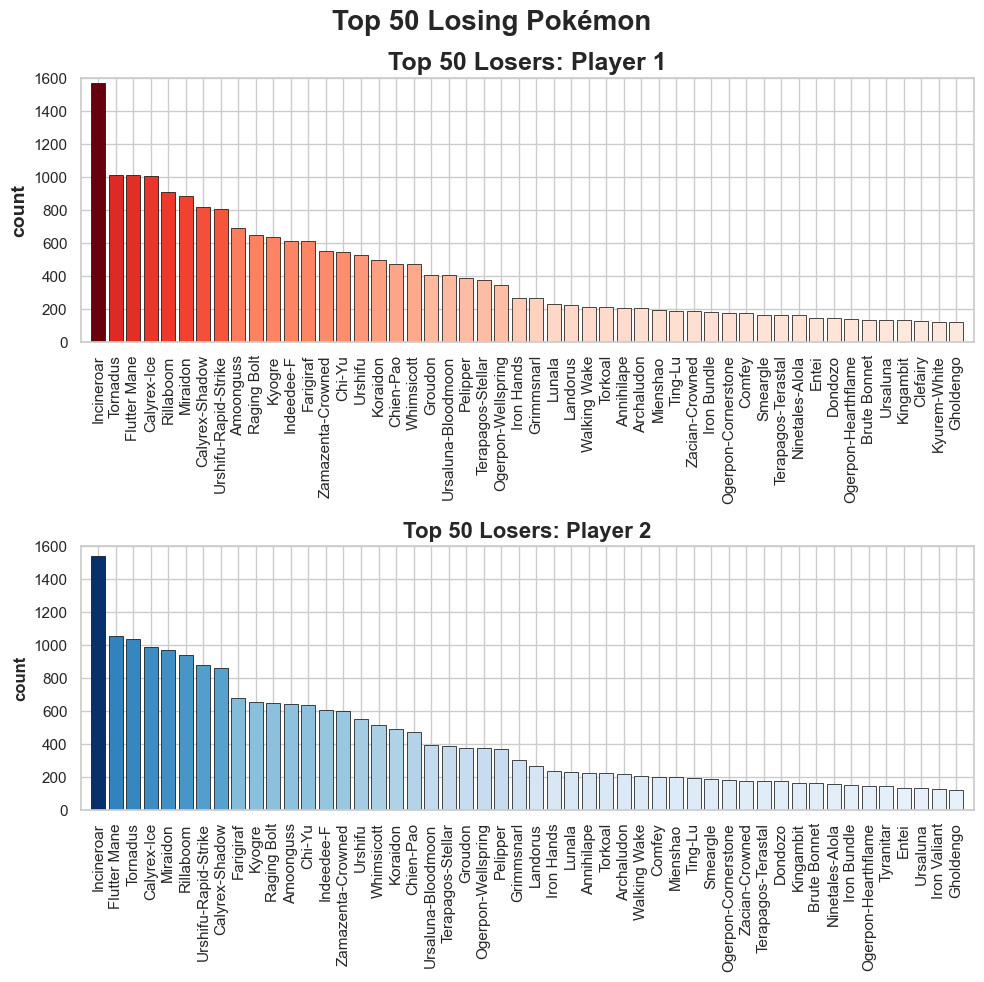

In [447]:
# Combine Losers
y = p1_losing_mons_df_thresh['count']
my_cmap_R = plt.get_cmap("Reds")
rescale_red = lambda y: (y) / (np.max(y))

y = p2_losing_mons_df_thresh['count']
my_cmap_B = plt.get_cmap("Blues")
rescale_blue = lambda y: (y) / (np.max(y))

plt.figure(figsize = (10,10))

# losing pokemons p1
sns.set_style("whitegrid")
ax1 = plt.subplot(2,1,1) 
ax1.bar(p1_losing_mons_df_thresh['value'],
        p1_losing_mons_df_thresh['count'],
        edgecolor = 'black',
        linewidth = 0.5,
        color = my_cmap_R(rescale_red(y)))

plt.ylim(0, 1600)
plt.xlim(-1, 50)
plt.xticks(rotation = 90)

#plt.xlabel("Pokemon Name", fontsize = 12, weight = 'bold')
plt.ylabel("count", fontsize = 14, weight = 'bold')
plt.title("Top 50 Losers: Player 1", fontsize = 18, weight = 'bold')
  
# losing pokemons p2
ax2 = plt.subplot(2,1,2) 
ax2.bar(p2_losing_mons_df_thresh['value'],
        p2_losing_mons_df_thresh['count'],
        edgecolor = 'black',
        linewidth = 0.5,
        color = my_cmap_B(rescale_blue(y)))

plt.ylim(0, 1600)
plt.xlim(-1, 50)
plt.xticks(rotation = 90)

#plt.xlabel("Pokemon Name", fontsize = 12, weight = 'bold')
plt.ylabel("count", fontsize = 12, weight = 'bold')
plt.title("Top 50 Losers: Player 2", fontsize = 16, weight = 'bold')

plt.suptitle('Top 50 Losing Pokémon', weight = 'bold', fontsize = 20)

plt.tight_layout()

plt.savefig('Top_50_Pokemon_Losers.png', bbox_inches = 'tight')


### Q: What is the distribution of all pokemon type combinations?

In [448]:
pokemon_stat_type_info = pd.read_csv("../../data/pokedex.csv")

print(pokemon_stat_type_info.info())
pokemon_stat_type_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Pokedex_ID   1419 non-null   int64 
 1   Name         1419 non-null   object
 2   Type1        1419 non-null   object
 3   Type2        745 non-null    object
 4   HP           1419 non-null   int64 
 5   Attack       1419 non-null   int64 
 6   Defense      1419 non-null   int64 
 7   SpAtk        1419 non-null   int64 
 8   SpDef        1419 non-null   int64 
 9   Speed        1419 non-null   int64 
 10  Total_Stats  1419 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 122.1+ KB
None


,Pokedex_ID,Name,Type1,Type2,HP,Attack,Defense,SpAtk,SpDef,Speed,Total_Stats
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525
3,3,Venusaur-Mega,Grass,Poison,80,100,123,122,120,80,625
4,3,Venusaur-Gmax,Grass,Poison,80,82,83,100,100,80,525
...,...,...,...,...,...,...,...,...,...,...,...
1414,1023,Iron Crown,Steel,Psychic,90,72,100,122,108,98,590
1415,1024,Terapagos,Normal,NaN,90,65,85,65,85,60,450
1416,1024,Terapagos-Terastal,Normal,NaN,95,95,110,105,110,85,600
1417,1024,Terapagos-Stellar,Normal,NaN,160,105,110,130,110,85,700


#### Count all possible Type1-Type2 combinations
If a pokemon is mono-type, set `Type2` = `Type1`

In [449]:
#counting all typing combinations

type_df = pokemon_stat_type_info.copy()
type_df = type_df[['Type1', 'Type2']]

#if a pokemon has a single type, type 2 = type 1
type_df['Type2'] = type_df['Type2'].fillna(value = type_df['Type1'], inplace=False)

#counting all type1+2 combinations
type_df = type_df[['Type1', 'Type2']].groupby(['Type1', 'Type2']).size().reset_index()
type_df.columns = ['Type1', 'Type2', 'count']

#combind reciprocal combinations (ie: total value for Bug-Dark + Dark-Bug)
type_df['Type1a'] = type_df.apply(lambda row: min(row['Type1'], row['Type2']), axis = 1)
type_df['Type2a'] = type_df.apply(lambda row: max(row['Type1'], row['Type2']), axis = 1)

type_df2 = type_df.groupby(['Type1a', 'Type2a'])['count'].sum().reset_index()

type_df2.head(50)

type_pivoted_df = type_df2.pivot_table(columns = 'Type1a', index = 'Type2a', values = 'count')
type_pivoted_df

Type1a,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type2a,,,,,,,,,,,,,,,,,,
Bug,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dark,1.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dragon,NaN,5.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electric,5.0,2.0,5.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fairy,3.0,4.0,1.0,2.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fighting,5.0,5.0,4.0,3.0,1.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire,5.0,5.0,4.0,1.0,NaN,8.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flying,34.0,8.0,8.0,8.0,4.0,3.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ghost,1.0,3.0,5.0,1.0,5.0,2.0,9.0,3.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Plot: Typing Combinations frequencies

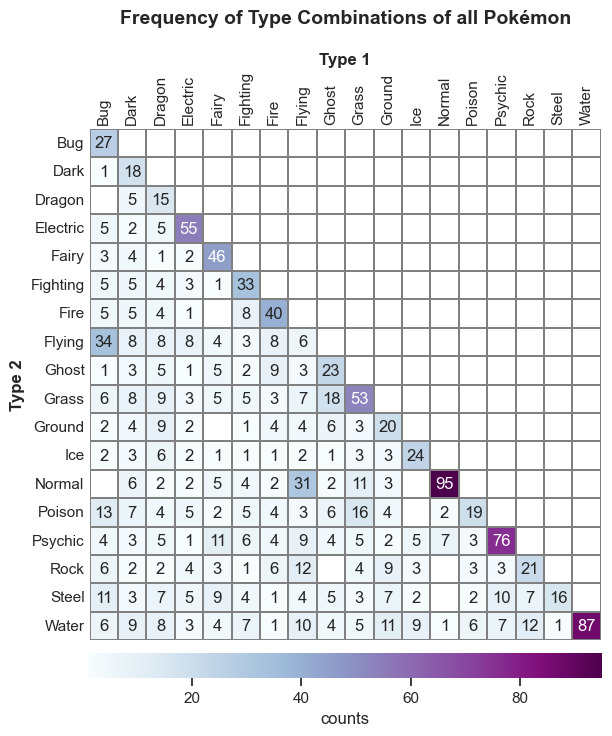

In [450]:
sns.set_theme(style="white")
plt.subplots(figsize=(8,8))
ax = sns.heatmap(type_pivoted_df, annot=True, square=True, cmap='BuPu',
                 linecolor='gray', linewidths='0.05',
                 cbar_kws={'shrink': 0.83,'label': 'counts', 'location': 'bottom', 'pad': 0.02})

ax.xaxis.tick_top()
plt.tick_params(length = 0)
plt.xticks(rotation = 90) 
ax.xaxis.set_label_position('top') 

plt.xlabel('Type 1', weight = "bold")
plt.ylabel('Type 2', weight = "bold")

plt.title('Frequency of Type Combinations of all Pokémon\n', fontsize = 14, weight = "bold")

plt.savefig('Typing_Combinations.png', bbox_inches = 'tight')

plt.show()

#### typing distribution for top50 pokemons

In [451]:
pokemon_stat_type_info = pokemon_stat_type_info.copy()
top50_poke = ['Incineroar', 'Tornadus', 'Calyrex-Ice', 'Flutter Mane', 'Miraidon', 'Rillaboom', 'Calyrex-Shadow', 'Urshifu-Rapid-Strike', 'Raging Bolt',
'Amoonguss', 'Kyogre', 'Indeedee-F', 'Zamazenta-Crowned', 'Chi-Yu', 'Farigiraf', 'Urshifu', 'Whimsicott', 'Koraidon', 'Terapagos-Stellar',
'Chien-Pao', 'Groudon', 'Ursaluna-Bloodmoon', 'Ogerpon-Wellspring', 'Pelipper', 'Grimmsnarl', 'Iron Hands', 'Lunala', 'Annihilape', 'Mienshao',
'Torkoal', 'Landorus', 'Ting-Lu', 'Ogerpon-Cornerstone', 'Archaludon', 'Comfey', 'Zacian-Crowned', 'Walking Wake', 'Smeargle', 'Dondozo', 'Brute Bonnet',
'Entei', 'Ninetales-Alola', 'Iron Bundle', 'Terapagos-Terastal', 'Ursaluna', 'Kingambit', 'Tyranitar', 'Gholdengo', 'Clefairy', 'Sableye']

temp = pokemon_stat_type_info['Name'].isin(top50_poke)
type_top50_poke = pokemon_stat_type_info[temp]
type_top50_poke

,Pokedex_ID,Name,Type1,Type2,HP,Attack,Defense,SpAtk,SpDef,Speed,Total_Stats
66,35,Clefairy,Fairy,NaN,70,45,48,60,65,35,323
71,38,Ninetales-Alola,Ice,Fairy,73,67,75,81,100,109,505
354,235,Smeargle,Normal,NaN,55,20,35,20,45,75,250
363,244,Entei,Fire,NaN,115,115,85,90,75,100,580
367,248,Tyranitar,Rock,Dark,100,134,110,95,100,61,600
404,279,Pelipper,Water,Flying,60,50,100,95,70,65,440
428,302,Sableye,Dark,Ghost,50,75,75,65,65,50,380
457,324,Torkoal,Fire,NaN,70,85,140,85,70,20,470
526,382,Kyogre,Water,NaN,100,100,90,150,140,90,670
528,383,Groudon,Ground,NaN,100,150,140,100,90,90,670


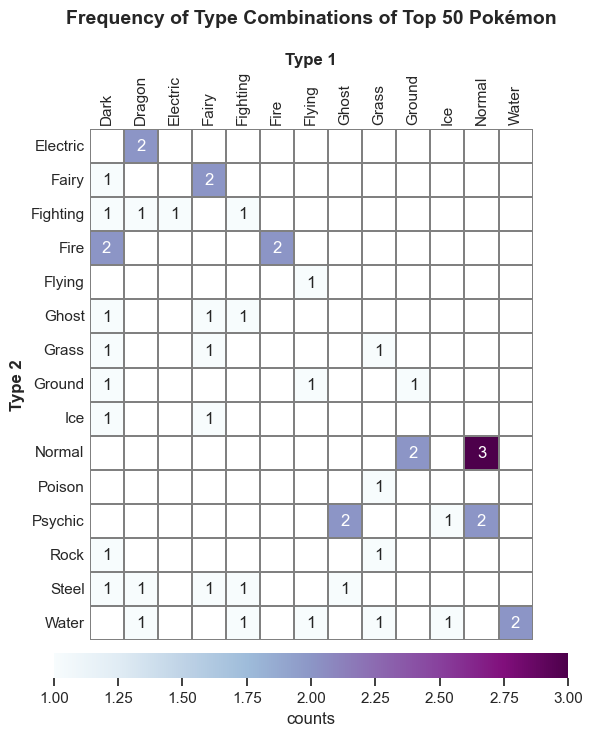

In [452]:
#counting all typing combinations between top 50 pokemon

type_top50_df = type_top50_poke.copy()
type_top50_df = type_top50_df[['Type1', 'Type2']]

#if a pokemon has a single type, type 2 = type 1
type_top50_df['Type2'] = type_top50_df['Type2'].fillna(value = type_top50_df['Type1'], inplace=False)

#counting all type1+2 combinations
type_top50_df = type_top50_df[['Type1', 'Type2']].groupby(['Type1', 'Type2']).size().reset_index()
type_top50_df.columns = ['Type1', 'Type2', 'count']

#combind reciprocal combinations (ie: total value for Bug-Dark + Dark-Bug)
type_top50_df['Type1a'] = type_top50_df.apply(lambda row: min(row['Type1'], row['Type2']), axis = 1)
type_top50_df['Type2a'] = type_top50_df.apply(lambda row: max(row['Type1'], row['Type2']), axis = 1)

type_top50_df2 = type_top50_df.groupby(['Type1a', 'Type2a'])['count'].sum().reset_index()

type_top50_df2.head(50)

type_top50_pivoted_df = type_top50_df2.pivot_table(columns = 'Type1a', index = 'Type2a', values = 'count')
type_top50_pivoted_df

sns.set_theme(style="white")
plt.subplots(figsize=(8,8))
ax = sns.heatmap(type_top50_pivoted_df, annot=True, square=True, cmap='BuPu',
                 linecolor='gray', linewidths='0.05',
                 cbar_kws={'shrink': 0.83,'label': 'counts', 'location': 'bottom', 'pad': 0.02})

ax.xaxis.tick_top()
plt.tick_params(length = 0)
plt.xticks(rotation = 90) 
ax.xaxis.set_label_position('top') 

plt.xlabel('Type 1', weight = "bold")
plt.ylabel('Type 2', weight = "bold")

plt.title('Frequency of Type Combinations of Top 50 Pokémon\n', fontsize = 14, weight = "bold")

plt.savefig('Typing_Combinations_Top50.png', bbox_inches = 'tight')

plt.show()

### Q: Are there any correlations between certain pokemon stats?

#### Plot: correlation between all 6 stats

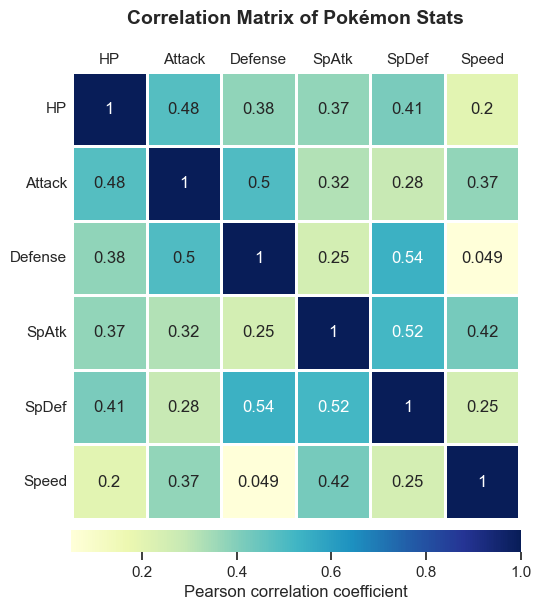

In [453]:
stats_corr_df = pokemon_stat_type_info.copy()

stats_corr_df = stats_corr_df[['HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed']]

stats_corr_df.corr


sns.set_theme(style="white")
plt.subplots(figsize=(7,7))
ax = sns.heatmap(stats_corr_df.corr(), annot = True, square = True, cmap = "YlGnBu",
                 linecolor='white', linewidth = 1,
                 cbar_kws={'shrink': 0.83,'label': 'Pearson correlation coefficient', 'location': 'bottom', 'pad': 0.02})           

ax.xaxis.tick_top()
plt.tick_params(length = 0)
plt.yticks(rotation = 0) 
ax.xaxis.set_label_position('top') 

plt.title('Correlation Matrix of Pokémon Stats\n', fontsize = 14, weight = "bold")

plt.savefig('Stat_Correlation_Matrix.png', bbox_inches = 'tight')

plt.show()

#### What are the stats for the top 100 winning pokemnon?
<i>Compare the distribution of stats relative to one another</i>

Stat Comparisions
- Attack vs Defense
- SpAtk vs SpDef
- Total At vs Total Def (Total Power)
- Speed Distribution
- Physical Sweeper vs Special Sweeper
    - Physical Sweeper = Attack + Speed
    - Special Sweeper = Sp. Atk + Speed
- Physical Tank vs Special Tank
    - Physical Tank = Attack + Defense
    - Special Tank = Sp. Atk + Sp. Def

In [454]:
#Format stats table:

stats_df = pokemon_stat_type_info[['Pokedex_ID', 'HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed', 'Total_Stats']]
stats_df

stats_df['Total_Attack'] = stats_df['Attack'] + stats_df['SpAtk']
stats_df['Total_Defense'] = stats_df['Defense'] + stats_df['SpDef']

stats_df['Physical_Sweeper'] = stats_df['Attack'] + stats_df['Speed']
stats_df['Special_Sweeper'] = stats_df['SpAtk'] + stats_df['Speed']

stats_df['Physical_Tank'] = stats_df['Attack'] + stats_df['Defense']
stats_df['Special_Tank'] = stats_df['SpAtk'] + stats_df['SpDef']

stats_df['Total_Power'] = stats_df['Attack'] + stats_df['Defense'] + stats_df['SpAtk'] + stats_df['SpDef'] + stats_df['Speed']

stats_df

/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_15016/3779838231.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df['Total_Attack'] = stats_df['Attack'] + stats_df['SpAtk']
/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_15016/3779838231.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df['Total_Defense'] = stats_df['Defense'] + stats_df['SpDef']


,Pokedex_ID,HP,Attack,Defense,SpAtk,SpDef,Speed,Total_Stats,Total_Attack,Total_Defense,Physical_Sweeper,Special_Sweeper,Physical_Tank,Special_Tank,Total_Power
0,1,45,49,49,65,65,45,318,114,114,94,110,98,130,273
1,2,60,62,63,80,80,60,405,142,143,122,140,125,160,345
2,3,80,82,83,100,100,80,525,182,183,162,180,165,200,445
3,3,80,100,123,122,120,80,625,222,243,180,202,223,242,545
4,3,80,82,83,100,100,80,525,182,183,162,180,165,200,445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,1023,90,72,100,122,108,98,590,194,208,170,220,172,230,500
1415,1024,90,65,85,65,85,60,450,130,170,125,125,150,150,360
1416,1024,95,95,110,105,110,85,600,200,220,180,190,205,215,505
1417,1024,160,105,110,130,110,85,700,235,220,190,215,215,240,540


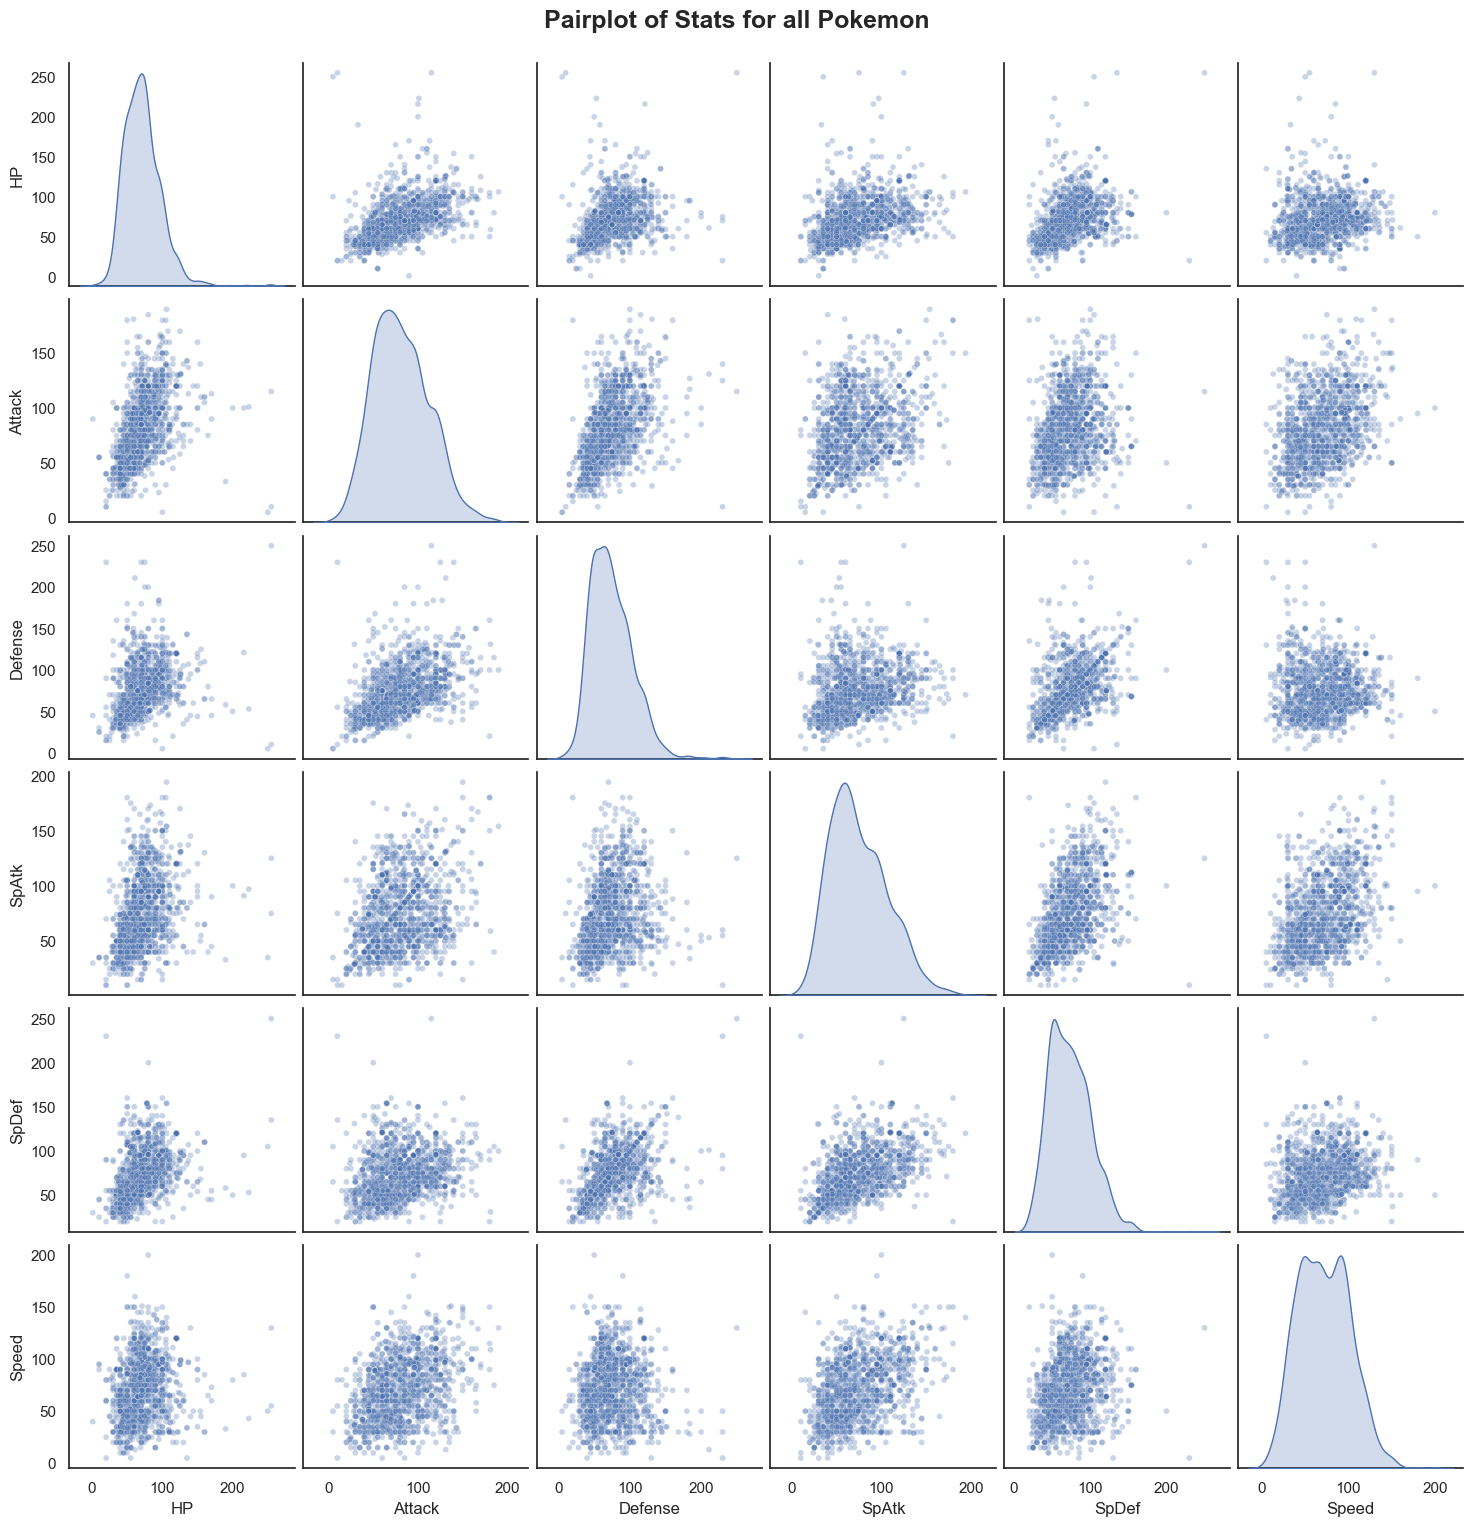

In [465]:
#pairplot of stats for all pokemon:

sns.pairplot(data = stats_df, x_vars = stats_df.columns[1:7], y_vars = stats_df.columns[1:7], diag_kind="kde",
             plot_kws = {'alpha':0.3, 'ec':'white', 'size':10})

plt.suptitle('Pairplot of Stats for all Pokemon\n\n', fontsize = 18, weight = "bold", y=1.02)

plt.savefig('Stat_Pairplot.png', bbox_inches = 'tight')

plt.show()

#### Where do the top pokemon fall?

In [456]:
#Finding the top 100 winning pokemon:
wokring_df_copy = all_winning_pkmn_df.copy()
wokring_df_copy


# filter out 'unknown' values and modify count threshold to return top 100 pokemon used
frequent_winners_df_thresh = wokring_df_copy[wokring_df_copy['count'] > 235]
frequent_winners_df_thresh = frequent_winners_df_thresh[wokring_df_copy['value'] != 'unknown']

frequent_winners_df_thresh.rename(columns={"value": "Name"}, inplace=True)
frequent_winners_df_thresh

/var/folders/36/r84t02gd3qs_w8pf4g0p13g40000gn/T/ipykernel_15016/3787465200.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frequent_winners_df_thresh = frequent_winners_df_thresh[wokring_df_copy['value'] != 'unknown']


,Name,count
1,Incineroar,2761
2,Tornadus,2049
3,Calyrex-Ice,2043
4,Flutter Mane,1966
5,Miraidon,1753
6,Rillaboom,1660
7,Calyrex-Shadow,1547
8,Urshifu-Rapid-Strike,1525
9,Raging Bolt,1359
10,Amoonguss,1273


In [457]:
#merge the stats into the top100 df + stat combinations
pokemon_info_df = pokemon_stat_type_info[['Name', 'HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed', 'Total_Stats']]
pokemon_info_df

top100_winners_stats = pd.merge(frequent_winners_df_thresh, pokemon_info_df, how = 'inner', on = ['Name'])

top100_winners_stats['Total_Attack'] = top100_winners_stats['Attack'] + top100_winners_stats['SpAtk']
top100_winners_stats['Total_Defense'] = top100_winners_stats['Defense'] + top100_winners_stats['SpDef']

top100_winners_stats['Physical_Sweeper'] = top100_winners_stats['Attack'] + top100_winners_stats['Speed']
top100_winners_stats['Special_Sweeper'] = top100_winners_stats['SpAtk'] + top100_winners_stats['Speed']

top100_winners_stats['Physical_Tank'] = top100_winners_stats['Attack'] + top100_winners_stats['Defense']
top100_winners_stats['Special_Tank'] = top100_winners_stats['SpAtk'] + top100_winners_stats['SpDef']

top100_winners_stats['Total_Power'] = top100_winners_stats['Attack'] + top100_winners_stats['Defense'] + top100_winners_stats['SpAtk'] + top100_winners_stats['SpDef'] + top100_winners_stats['Speed']

top100_winners_stats

,Name,count,HP,Attack,Defense,SpAtk,SpDef,Speed,Total_Stats,Total_Attack,Total_Defense,Physical_Sweeper,Special_Sweeper,Physical_Tank,Special_Tank,Total_Power
0,Incineroar,2761,95,115,90,80,90,60,530,195,180,175,140,205,170,435
1,Tornadus,2049,79,115,70,125,80,111,580,240,150,226,236,185,205,501
2,Calyrex-Ice,2043,100,165,150,85,130,50,680,250,280,215,135,315,215,580
3,Flutter Mane,1966,55,55,55,135,135,135,570,190,190,190,270,110,270,515
4,Miraidon,1753,100,85,100,135,115,135,670,220,215,220,270,185,250,570
5,Rillaboom,1660,100,125,90,60,70,85,530,185,160,210,145,215,130,430
6,Calyrex-Shadow,1547,100,85,80,165,100,150,680,250,180,235,315,165,265,580
7,Urshifu-Rapid-Strike,1525,100,130,100,63,60,97,550,193,160,227,160,230,123,450
8,Raging Bolt,1359,125,73,91,137,89,75,590,210,180,148,212,164,226,465
9,Amoonguss,1273,114,85,70,85,80,30,464,170,150,115,115,155,165,350


#### Plots: 

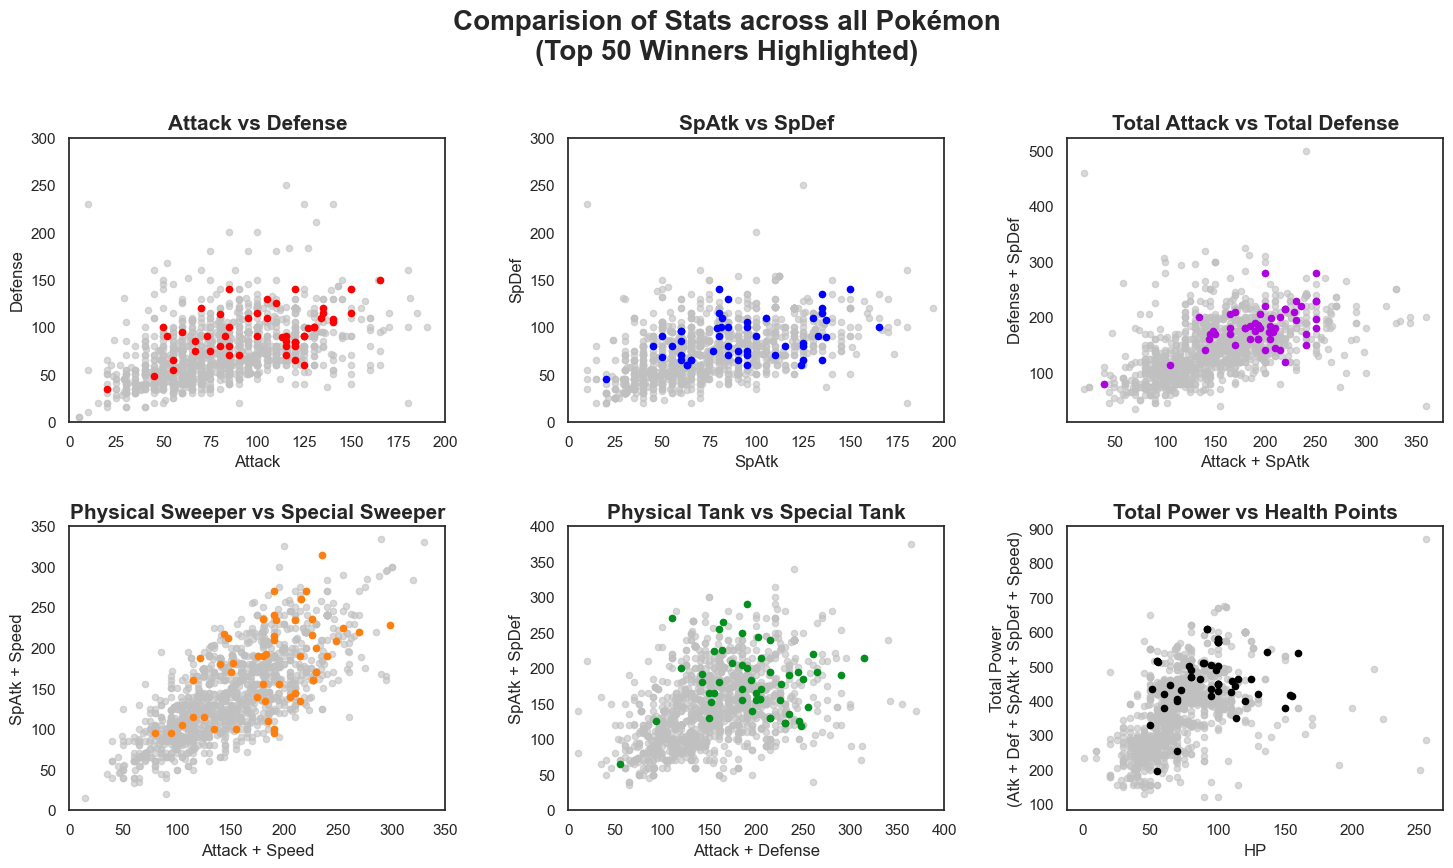

In [458]:
figure, axis = plt.subplots(2, 3, figsize=(15, 9))
  
# Attack vs Defense
axis[0, 0].scatter(stats_df['Attack'], stats_df['Defense'], alpha = 0.6, color = 'silver', s = 20) 
axis[0, 0].scatter(top100_winners_stats['Attack'], top100_winners_stats['Defense'], alpha = 1, color = 'red', s = 20) 
axis[0, 0].set_title("Attack vs Defense", weight = 'bold', fontsize = 15) 
axis[0, 0].set_xlim(0, 200)
axis[0, 0].set_ylim(0, 300)
axis[0, 0].set_xlabel("Attack")
axis[0, 0].set_ylabel("Defense")
  
# SpAtk vs SpDef 
axis[0, 1].scatter(stats_df['SpAtk'], stats_df['SpDef'], alpha = 0.6, color = 'silver', s = 20)
axis[0, 1].scatter(top100_winners_stats['SpAtk'], top100_winners_stats['SpDef'],
                   alpha = 1, color = 'blue', s = 20)  
axis[0, 1].set_title("SpAtk vs SpDef", weight = 'bold', fontsize = 15)
axis[0, 1].set_xlim(0, 200)
axis[0, 1].set_ylim(0, 300)
axis[0, 1].set_xlabel("SpAtk")
axis[0, 1].set_ylabel("SpDef")

# Total Atk vs Total Def 
axis[0, 2].scatter(stats_df['Total_Attack'], stats_df['Total_Defense'], alpha = 0.6, color = 'silver', s = 20) 
axis[0, 2].scatter(top100_winners_stats['Total_Attack'], top100_winners_stats['Total_Defense'],
                   alpha = 1, color = 'xkcd:vibrant purple', s = 20) 
axis[0, 2].set_title("Total Attack vs Total Defense", weight = 'bold', fontsize = 15)
#axis[0, 2].set_xlim(0, 200)
#axis[0, 2].set_ylim(0, 300)
axis[0, 2].set_xlabel("Attack + SpAtk")
axis[0, 2].set_ylabel("Defense + SpDef")


# Physical Sweeper vs Special Sweeper
axis[1, 0].scatter(stats_df['Physical_Sweeper'], stats_df['Special_Sweeper'], alpha = 0.6, color = 'silver', s = 20) 
axis[1, 0].scatter(top100_winners_stats['Physical_Sweeper'], top100_winners_stats['Special_Sweeper'],
                   alpha = 1, color = 'tab:orange', s = 20)   
axis[1, 0].set_title("Physical Sweeper vs Special Sweeper", weight = 'bold', fontsize = 15)
axis[1, 0].set_xlim(0, 350)
axis[1, 0].set_ylim(0, 350)
axis[1, 0].set_xlabel("Attack + Speed")
axis[1, 0].set_ylabel("SpAtk + Speed")

# Physical Tank vs Special Tank 
axis[1, 1].scatter(stats_df['Physical_Tank'], stats_df['Special_Tank'], alpha = 0.6, color = 'silver', s = 20) 
axis[1, 1].scatter(top100_winners_stats['Physical_Tank'], top100_winners_stats['Special_Tank'],
                   alpha = 1, color = 'xkcd:emerald green', s = 20) 
axis[1, 1].set_title("Physical Tank vs Special Tank", weight = 'bold', fontsize = 15) 
axis[1, 1].set_xlim(0, 400)
axis[1, 1].set_ylim(0, 400)
axis[1, 1].set_xlabel("Attack + Defense")
axis[1, 1].set_ylabel("SpAtk + SpDef")

# Speed distribution
axis[1, 2].scatter(stats_df['HP'], stats_df['Total_Power'], alpha = 0.6, color = 'silver', s = 20)
axis[1, 2].scatter(top100_winners_stats['HP'], top100_winners_stats['Total_Power'],
                   alpha = 1, color = 'black', s = 20)   
axis[1, 2].set_title("Total Power vs Health Points", weight = 'bold', fontsize = 15)
#axis[1, 2].set_ylim(0, 250)
axis[1, 2].set_xlabel("HP")
axis[1, 2].set_ylabel("Total Power\n(Atk + Def + SpAtk + SpDef + Speed)")

plt.suptitle('Comparision of Stats across all Pokémon\n(Top 50 Winners Highlighted)', weight = 'bold', fontsize = 20)

figure.tight_layout(pad = 2.0)

plt.savefig('Stat_Comparisions.png', bbox_inches = 'tight')

#### Update battle log file `training02.csv` with base stats and typing
need to insert base stats (7) and typing (18) for each pokemon = 25 cols/pokemon, 100 cols total
- stats stored in `pokemon_stat_type_info`
    - stats: 'HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed', 'Total_Stats'
- pokemon typing: store in new dataframe `pokemon_types_OHE`
    - one-hot encoded per type

- save file as `training02_stat_type.csv`

#### Inserting base stats into the `training02` dataset

In [459]:
training_data_df = training_data.copy()

#merge stats for each pokemon into the df
pokemon_stat_type_df = pokemon_stat_type_info[['Name', 'HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed', 'Total_Stats']]

# inserting stats for pokemon p1a
training_data_df.rename(columns = {"p1a_form": "Name"}, inplace = True)
training_data_addp1a = pd.merge(training_data_df, pokemon_stat_type_df, how = 'inner', on = ['Name'])
training_data_addp1a.rename(columns = {"Name": "p1a_Name", "HP": "p1a_HP", "Attack": "p1a_Attack",
                                       "Defense": "p1a_Defense", "SpAtk": "p1a_SpAtk", "SpDef": "p1a_SpDef",
                                       "Speed": "p1a_Speed", "Total_Stats": "p1a_Total_Stats"}, inplace = True)
training_data_addp1a


# inserting stats for pokemon p1b
training_data_addp1a.rename(columns = {"p1b_form": "Name"}, inplace = True)
training_data_addp1b = pd.merge(training_data_addp1a, pokemon_stat_type_df, how = 'inner', on = ['Name'])
training_data_addp1b.rename(columns = {"Name": "p1b_Name", "HP": "p1b_HP", "Attack": "p1b_Attack",
                                       "Defense": "p1b_Defense", "SpAtk": "p1b_SpAtk", "SpDef": "p1b_SpDef",
                                       "Speed": "p1b_Speed", "Total_Stats": "p1b_Total_Stats"}, inplace = True)
training_data_addp1b


# inserting stats for pokemon p2a
training_data_addp1b.rename(columns = {"p2a_form": "Name"}, inplace = True)
training_data_addp2a = pd.merge(training_data_addp1b, pokemon_stat_type_df, how = 'inner', on = ['Name'])
training_data_addp2a.rename(columns = {"Name": "p2a_Name", "HP": "p2a_HP", "Attack": "p2a_Attack",
                                       "Defense": "p2a_Defense", "SpAtk": "p2a_SpAtk", "SpDef": "p2a_SpDef",
                                       "Speed": "p2a_Speed", "Total_Stats": "p2a_Total_Stats"}, inplace = True)
training_data_addp2a


# inserting stats for pokemon p2b
training_data_addp2a.rename(columns = {"p2b_form": "Name"}, inplace = True)
training_data_addp2b = pd.merge(training_data_addp2a, pokemon_stat_type_df, how = 'inner', on = ['Name'])
training_data_addp2b.rename(columns = {"Name": "p2b_Name", "HP": "p2b_HP", "Attack": "p2b_Attack",
                                       "Defense": "p2b_Defense", "SpAtk": "p2b_SpAtk", "SpDef": "p2b_SpDef",
                                       "Speed": "p2b_Speed", "Total_Stats": "p2b_Total_Stats"}, inplace = True)
training_data_addp2b


training02_stats = training_data_addp2b.copy()


# note: _form is now _Name for each pokemon
    #ex: p1a_form -> p1a_Name
# note: p1a_hp != p1a_HP for each pokemon
    # _hp is the hp of each pokemon during the battle
    # _HP is the pokemon's base health points
for col in training02_stats.columns:
    print(col)


battle_id
turn
total_turn
rank
weather
field
condition
p1_side
p1a_Name
p1a_hp
p1a_ability
p1a_item
p1a_move
p1a_status
p1a_tera
p1a_stat_boost
p1a_status_other
p1b_Name
p1b_hp
p1b_ability
p1b_item
p1b_move
p1b_status
p1b_tera
p1b_stat_boost
p1b_status_other
p1c_form
p1c_hp
p1c_ability
p1c_item
p1c_move
p1c_status
p1c_tera
p1d_form
p1d_hp
p1d_ability
p1d_item
p1d_move
p1d_status
p1d_tera
p2_side
p2a_Name
p2a_hp
p2a_ability
p2a_item
p2a_move
p2a_status
p2a_tera
p2a_stat_boost
p2a_status_other
p2b_Name
p2b_hp
p2b_ability
p2b_item
p2b_move
p2b_status
p2b_tera
p2b_stat_boost
p2b_status_other
p2c_form
p2c_hp
p2c_ability
p2c_item
p2c_move
p2c_status
p2c_tera
p2d_form
p2d_hp
p2d_ability
p2d_item
p2d_move
p2d_status
p2d_tera
win
p1a_HP
p1a_Attack
p1a_Defense
p1a_SpAtk
p1a_SpDef
p1a_Speed
p1a_Total_Stats
p1b_HP
p1b_Attack
p1b_Defense
p1b_SpAtk
p1b_SpDef
p1b_Speed
p1b_Total_Stats
p2a_HP
p2a_Attack
p2a_Defense
p2a_SpAtk
p2a_SpDef
p2a_Speed
p2a_Total_Stats
p2b_HP
p2b_Attack
p2b_Defense
p2b_SpAtk
p

#### One-Hot encoding types: for all pokemon

In [460]:
pokemon_types = pokemon_stat_type_info.copy()
pokemon_types

pokemon_types_OHE = pokemon_types[['Name']].join(pd.get_dummies(pokemon_types.filter(like='Type').stack(),
                                                                dtype = int).groupby(level=0).max())
pokemon_types_OHE

,Name,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,Bulbasaur,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,Ivysaur,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,Venusaur,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,Venusaur-Mega,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,Venusaur-Gmax,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,Iron Crown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1415,Terapagos,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1416,Terapagos-Terastal,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1417,Terapagos-Stellar,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### Inserting OHE-types into `training02_stats` dataset

In [461]:
types_onehot_temp = pokemon_types_OHE.copy()


# inserting typing for pokemon p1a
types_onehot_temp.rename(columns = {"Name": "p1a_Name"}, inplace = True)
training_data_p1a_type = pd.merge(training02_stats, types_onehot_temp, how = 'inner', on = ['p1a_Name'])

training_data_p1a_type.rename(columns = {"Bug":"p1a_Bug", "Dark":"p1a_Dark", "Dragon":"p1a_Dragon",
                                              "Electric":"p1a_Electric", "Fairy":"p1a_Fairy", "Fighting":"p1a_Fighting",
                                              "Fire":"p1a_Fire", "Flying":"p1a_Flying", "Ghost":"p1a_Ghost",
                                              "Grass":"p1a_Grass", "Ground":"p1a_Ground", "Ice":"p1a_Ice",
                                              "Normal":"p1a_Normal", "Poison":"p1a_Poison", "Psychic":"p1a_Psychic",
                                              "Rock":"p1a_Rock", "Steel":"p1a_Steel", "Water":"p1a_Water"}, inplace = True)
training_data_p1a_type


# inserting typing for pokemon p1b
types_onehot_temp.rename(columns = {"p1a_Name": "p1b_Name"}, inplace = True)
training_data_p1b_type = pd.merge(training_data_p1a_type, types_onehot_temp, how = 'inner', on = ['p1b_Name'])

training_data_p1b_type.rename(columns = {"Bug":"p1b_Bug", "Dark":"p1b_Dark", "Dragon":"p1b_Dragon",
                                              "Electric":"p1b_Electric", "Fairy":"p1b_Fairy", "Fighting":"p1b_Fighting",
                                              "Fire":"p1b_Fire", "Flying":"p1b_Flying", "Ghost":"p1b_Ghost",
                                              "Grass":"p1b_Grass", "Ground":"p1b_Ground", "Ice":"p1b_Ice",
                                              "Normal":"p1b_Normal", "Poison":"p1b_Poison", "Psychic":"p1b_Psychic",
                                              "Rock":"p1b_Rock", "Steel":"p1b_Steel", "Water":"p1b_Water"}, inplace = True)
training_data_p1b_type


# inserting typing for pokemon p2a
types_onehot_temp.rename(columns = {"p1b_Name": "p2a_Name"}, inplace = True)
training_data_p2a_type = pd.merge(training_data_p1b_type, types_onehot_temp, how = 'inner', on = ['p2a_Name'])

training_data_p2a_type.rename(columns = {"Bug":"p2a_Bug", "Dark":"p2a_Dark", "Dragon":"p2a_Dragon",
                                              "Electric":"p2a_Electric", "Fairy":"p2a_Fairy", "Fighting":"p2a_Fighting",
                                              "Fire":"p2a_Fire", "Flying":"p2a_Flying", "Ghost":"p2a_Ghost",
                                              "Grass":"p2a_Grass", "Ground":"p2a_Ground", "Ice":"p2a_Ice",
                                              "Normal":"p2a_Normal", "Poison":"p2a_Poison", "Psychic":"p2a_Psychic",
                                              "Rock":"p2a_Rock", "Steel":"p2a_Steel", "Water":"p2a_Water"}, inplace = True)
training_data_p2a_type



# inserting typing for pokemon p2b
types_onehot_temp.rename(columns = {"p2a_Name": "p2b_Name"}, inplace = True)
training_data_p2b_type = pd.merge(training_data_p2a_type, types_onehot_temp, how = 'inner', on = ['p2b_Name'])

training_data_p2b_type.rename(columns = {"Bug":"p2b_Bug", "Dark":"p2b_Dark", "Dragon":"p2b_Dragon",
                                              "Electric":"p2b_Electric", "Fairy":"p2b_Fairy", "Fighting":"p2b_Fighting",
                                              "Fire":"p2b_Fire", "Flying":"p2b_Flying", "Ghost":"p2b_Ghost",
                                              "Grass":"p2b_Grass", "Ground":"p2b_Ground", "Ice":"p2b_Ice",
                                              "Normal":"p2b_Normal", "Poison":"p2b_Poison", "Psychic":"p2b_Psychic",
                                              "Rock":"p2b_Rock", "Steel":"p2b_Steel", "Water":"p2b_Water"}, inplace = True)
training_data_p2b_type


training02_stats_type = training_data_p2b_type.copy()

# print column names to check correct insertion
for col in training02_stats_type.columns:
    print(col)


battle_id
turn
total_turn
rank
weather
field
condition
p1_side
p1a_Name
p1a_hp
p1a_ability
p1a_item
p1a_move
p1a_status
p1a_tera
p1a_stat_boost
p1a_status_other
p1b_Name
p1b_hp
p1b_ability
p1b_item
p1b_move
p1b_status
p1b_tera
p1b_stat_boost
p1b_status_other
p1c_form
p1c_hp
p1c_ability
p1c_item
p1c_move
p1c_status
p1c_tera
p1d_form
p1d_hp
p1d_ability
p1d_item
p1d_move
p1d_status
p1d_tera
p2_side
p2a_Name
p2a_hp
p2a_ability
p2a_item
p2a_move
p2a_status
p2a_tera
p2a_stat_boost
p2a_status_other
p2b_Name
p2b_hp
p2b_ability
p2b_item
p2b_move
p2b_status
p2b_tera
p2b_stat_boost
p2b_status_other
p2c_form
p2c_hp
p2c_ability
p2c_item
p2c_move
p2c_status
p2c_tera
p2d_form
p2d_hp
p2d_ability
p2d_item
p2d_move
p2d_status
p2d_tera
win
p1a_HP
p1a_Attack
p1a_Defense
p1a_SpAtk
p1a_SpDef
p1a_Speed
p1a_Total_Stats
p1b_HP
p1b_Attack
p1b_Defense
p1b_SpAtk
p1b_SpDef
p1b_Speed
p1b_Total_Stats
p2a_HP
p2a_Attack
p2a_Defense
p2a_SpAtk
p2a_SpDef
p2a_Speed
p2a_Total_Stats
p2b_HP
p2b_Attack
p2b_Defense
p2b_SpAtk
p

In [462]:
# change `p1a_Name` back to `p1a_form`
    # save as csv file with typing one-hot encoded
training02_stats_type.rename(columns = {"p1a_Name": "p1a_form", "p1b_Name": "p1b_form",
                                        "p2a_Name": "p2a_form", "p2b_Name": "p2b_form"}, inplace = True)


training02_stats_type.to_csv('pokedex_ohe.csv', index = False)

training02_stats_type

,battle_id,turn,total_turn,rank,weather,field,condition,p1_side,p1a_form,p1a_hp,...,p2b_Ghost,p2b_Grass,p2b_Ground,p2b_Ice,p2b_Normal,p2b_Poison,p2b_Psychic,p2b_Rock,p2b_Steel,p2b_Water
0,2099996083,0,5,1643.5,NaN,Psychic Terrain:5,NaN,NaN,Smeargle,100,...,0,0,0,0,0,0,0,0,0,0
1,2099996083,1,5,1643.5,NaN,Psychic Terrain:4,Trick Room:4,NaN,Smeargle,1,...,0,0,0,0,0,0,0,0,0,0
2,2099996083,2,5,1643.5,SunnyDay:5,Psychic Terrain:3,Trick Room:3,NaN,Torkoal,100,...,0,0,0,0,0,0,0,0,0,0
3,2099996083,3,5,1643.5,SunnyDay:4,Psychic Terrain:2,Trick Room:2,NaN,Torkoal,100,...,0,0,0,0,0,0,0,0,0,0
4,2099996083,4,5,1643.5,SunnyDay:3,Psychic Terrain:1,Trick Room:1,NaN,Torkoal,55,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100019,2127998356,2,3,1464.5,NaN,Psychic Terrain:3,NaN,NaN,Flutter Mane,100,...,0,0,1,0,1,0,0,0,0,0
100020,2127998356,3,3,1464.5,NaN,Psychic Terrain:2,NaN,NaN,Flutter Mane,100,...,0,0,1,0,1,0,0,0,0,0
100021,2127999658,0,3,1064.0,SunnyDay:5,NaN,NaN,NaN,Groudon,100,...,0,0,0,0,1,0,1,0,0,0
100022,2127999658,1,3,1064.0,SunnyDay:4,NaN,NaN,NaN,Groudon,14,...,0,0,0,0,1,0,1,0,0,0


#### Save newly updated training dataset as `training02_stats_type.csv`

In [463]:
training02_stats_type.to_csv('trainingdata02_stats_type.csv', index = False)